# Project: No_show_appointments_Project


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In my project No_show_appointments I'm going to analyse dataset(cleaned from original data on Kaggle) it collects information
from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
Analysing this dataset allow us to answer many questions that are related to What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
>

### Ask Questions ?


<p> What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?</p>
<ol>
    <li>Is the waiting period an important factor?</li>
    <li>Is the day of the week also an important factor?</li>
    <li>Is chronic condition an important factor?</li>
    <li>Is the age an important factor?</li>
    <li>Is the gender an important factor?</li>
    
<ol>      


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Convert all column names to lowercase.
The appointmentDay doesn't contain a time.
we probably won't be analysing the PatientId, AppointmentID and SMS_received for our analysis because I don't suspect to be super useful in finding  What factors are important for us to know if a patient will show up for their scheduled appointment, I will drop them.

In [3]:
df.shape

(110527, 14)

110527 rows,
14 columns

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


we have wrong datavalue, nagative age (-1)

In [5]:
# search for the rows with negative age
negative_age = df.query("Age < 0")
negative_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


only one row has negative value-1, we can delete it

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


as we can see we don't have any missing value.

we should Convert the "ScheduledDay" and "AppointmentDay" column to date type.

In [7]:
# let see if we have duplicated values
df.duplicated().sum()

0

No duplicated rows.

In [8]:
# let see if we have null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

No null values

In [9]:
# check unique values in the dataset
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

from the result above we can distinguish that a patient can have one or more appointment.(AppointmentID > PatientId)

In [10]:
# count the No-show column values
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

88208 accepted appointment

22312 rejected appointment

In [11]:
# Waiting time between the first Appointment and the last appointment
df_appointment = pd.to_datetime(df['AppointmentDay'],format='%Y/%m/%d') 
last_appointment = df_appointment.max() #highest value
first_appointment = df_appointment.min() #lowest value
days_number = last_appointment - first_appointment
days_number

Timedelta('40 days 00:00:00')

our dataset is collected in an interval of 40days (from the first appointment to the last appointment we have a periode of 40 days) so our dataset is a littel bit limited.

In [12]:
# search for patient with handicap
df["Handcap"].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

we have only 2223 patient with a handicap (it is a very small number comparing to the number of patient without handicap)

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

#### Drop not used Columns

In [13]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['PatientId', 'AppointmentID', 'SMS_received'], axis = 1, inplace = True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,No


I droped the columns I'm not going to use.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  No-show         110527 non-null  object
dtypes: int64(6), object(5)
memory usage: 9.3+ MB


#### Change Column Names to lowercase 

In [15]:
columns = [v for v in df.columns]
for index, col in enumerate(columns):
    if "Day" in col:
        col = f'{col[:-3]}_day'  #use the _ between words
        columns[index] = col
    columns[index] = col.replace('-', '_').lower() # replace the - with  _ and put all words in lowercase
df.columns = columns
df.columns

Index(['gender', 'scheduled_day', 'appointment_day', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'no_show'],
      dtype='object')

All columns names are written with lowercase.

#### Drop the age row containing a negative value

In [16]:
negative_age_value = df.query("age < 0")
negative_age_value

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,no_show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,No


In [17]:
# drop the row containing negative age value
df.drop(labels=negative_age_value.index, axis=0, inplace=True)
# check if we have negative age value is deleted
negative_age_value = df.query("age < 0")
negative_age_value

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,no_show


No negative age value anymore.

#### Cretae a group of age

In [18]:
df.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

we can devide age to 4 section

In [19]:
bins = [0, 18, 37, 55, 115]
labels = ['0-18', '19-37', '38-55', '56-115']
age_group = pd.cut(x = df['age'], bins = bins, labels = labels, include_lowest = True)
df.insert(loc = 4, column = 'age_group', value = age_group)
df["age_group"].unique()

['56-115', '0-18', '19-37', '38-55']
Categories (4, object): ['0-18' < '19-37' < '38-55' < '56-115']

The age group was created, now we can use it to answer the qustion Is the age an important factor?

#### New handicap values

In [20]:
df.handcap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

old handicap values, we will use only 0 and 1 to mention a handicap or not.

In [21]:
df.handcap = pd.Series(np.where(df["handcap"] >= 1, 1, df["handcap"]),df.index)

In [22]:
df.handcap.value_counts()

0    108285
1      2241
Name: handcap, dtype: int64

as we can see we have now only two values 0 and 1.

#### Change the type of the scheduled_day and the appointment_day to datetime type

In [23]:
day_columns = ["scheduled_day", "appointment_day"]
for col in day_columns:
    df[col] = pd.to_datetime(pd.to_datetime(df[col],format='%Y/%m/%d').dt.date) # datetime format
df.head()

,gender,scheduled_day,appointment_day,age,age_group,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,no_show
0,F,2016-04-29,2016-04-29,62,56-115,JARDIM DA PENHA,0,1,0,0,0,No
1,M,2016-04-29,2016-04-29,56,56-115,JARDIM DA PENHA,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,56-115,MATA DA PRAIA,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,0-18,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,56-115,JARDIM DA PENHA,0,1,1,0,0,No


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   gender           110526 non-null  object        
 1   scheduled_day    110526 non-null  datetime64[ns]
 2   appointment_day  110526 non-null  datetime64[ns]
 3   age              110526 non-null  int64         
 4   age_group        110526 non-null  category      
 5   neighbourhood    110526 non-null  object        
 6   scholarship      110526 non-null  int64         
 7   hipertension     110526 non-null  int64         
 8   diabetes         110526 non-null  int64         
 9   alcoholism       110526 non-null  int64         
 10  handcap          110526 non-null  int64         
 11  no_show          110526 non-null  object        
dtypes: category(1), datetime64[ns](2), int64(6), object(3)
memory usage: 10.2+ MB


as we can see thetype of the two columns 'scheduled_day' and 'appointment_day' is changed from object(String) to datetime.  

#### Add a New Column for the waiting time 

In [25]:
#calculate the waiting days 
waiting_days = df['appointment_day'] - df['scheduled_day'] 
df.insert(loc=3, column='waiting_days', value=waiting_days)
df['waiting_days'] = df['waiting_days'].dt.days

In [26]:
df.head()

,gender,scheduled_day,appointment_day,waiting_days,age,age_group,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,no_show
0,F,2016-04-29,2016-04-29,0,62,56-115,JARDIM DA PENHA,0,1,0,0,0,No
1,M,2016-04-29,2016-04-29,0,56,56-115,JARDIM DA PENHA,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,0,62,56-115,MATA DA PRAIA,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,0,8,0-18,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,0,56,56-115,JARDIM DA PENHA,0,1,1,0,0,No


the waiting_days column was added.

In [27]:
df.waiting_days.describe()

count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting_days, dtype: float64

as we can see we have a negative values for waiting_days, we should delete it.

#### Add day_of_week column

In [28]:
day_of_week = df.appointment_day.dt.dayofweek
df.insert(loc=3, column='day_of_week', value=day_of_week)
df.head()

,gender,scheduled_day,appointment_day,day_of_week,waiting_days,age,age_group,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,no_show
0,F,2016-04-29,2016-04-29,4,0,62,56-115,JARDIM DA PENHA,0,1,0,0,0,No
1,M,2016-04-29,2016-04-29,4,0,56,56-115,JARDIM DA PENHA,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,4,0,62,56-115,MATA DA PRAIA,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,4,0,8,0-18,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,4,0,56,56-115,JARDIM DA PENHA,0,1,1,0,0,No


#### Change the type of no-show column

In [29]:
# change the type of no-show column to int
df["no_show"] = pd.Series(np.where(df["no_show"] == 'Yes', 1, 0),df.index)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   gender           110526 non-null  object        
 1   scheduled_day    110526 non-null  datetime64[ns]
 2   appointment_day  110526 non-null  datetime64[ns]
 3   day_of_week      110526 non-null  int64         
 4   waiting_days     110526 non-null  int64         
 5   age              110526 non-null  int64         
 6   age_group        110526 non-null  category      
 7   neighbourhood    110526 non-null  object        
 8   scholarship      110526 non-null  int64         
 9   hipertension     110526 non-null  int64         
 10  diabetes         110526 non-null  int64         
 11  alcoholism       110526 non-null  int64         
 12  handcap          110526 non-null  int64         
 13  no_show          110526 non-null  int32         
dtypes: category(1), date

#### Drop the rows with negative waiting_days value

In [31]:
nagative_waiting_days = df.query("waiting_days < 0")
nagative_waiting_days

,gender,scheduled_day,appointment_day,day_of_week,waiting_days,age,age_group,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,no_show
27033,M,2016-05-10,2016-05-09,0,-1,38,38-55,RESISTÊNCIA,0,0,0,0,1,1
55226,F,2016-05-18,2016-05-17,1,-1,19,19-37,SANTO ANTÔNIO,0,0,0,0,1,1
64175,F,2016-05-05,2016-05-04,2,-1,22,19-37,CONSOLAÇÃO,0,0,0,0,0,1
71533,F,2016-05-11,2016-05-05,3,-6,81,56-115,SANTO ANTÔNIO,0,0,0,0,0,1
72362,M,2016-05-04,2016-05-03,1,-1,7,0-18,TABUAZEIRO,0,0,0,0,0,1


In [32]:
# drop the rows containing negative value
df.drop(labels=nagative_waiting_days.index, axis=0, inplace=True)

In [33]:
nagative_waiting_days = df.query("waiting_days < 0")
nagative_waiting_days

,gender,scheduled_day,appointment_day,day_of_week,waiting_days,age,age_group,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,no_show


rows are deleted 

#### Create group of waiting days

In [34]:
df.waiting_days.describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting_days, dtype: float64

we can distinct 4 section

In [35]:
# create the waiting_days group 
bins = [-1, 0, 4, 15, 179]
labels = ['0 days', '1-4 days', '5-15 days', '16 days ++']
waiting_group = pd.cut(x = df['waiting_days'], bins = bins, labels = labels, include_lowest = True)
df.insert(loc = 4, column = 'waiting_group', value = waiting_group)
df.head()

,gender,scheduled_day,appointment_day,day_of_week,waiting_group,waiting_days,age,age_group,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,no_show
0,F,2016-04-29,2016-04-29,4,0 days,0,62,56-115,JARDIM DA PENHA,0,1,0,0,0,0
1,M,2016-04-29,2016-04-29,4,0 days,0,56,56-115,JARDIM DA PENHA,0,0,0,0,0,0
2,F,2016-04-29,2016-04-29,4,0 days,0,62,56-115,MATA DA PRAIA,0,0,0,0,0,0
3,F,2016-04-29,2016-04-29,4,0 days,0,8,0-18,PONTAL DE CAMBURI,0,0,0,0,0,0
4,F,2016-04-29,2016-04-29,4,0 days,0,56,56-115,JARDIM DA PENHA,0,1,1,0,0,0


#### Drop unused columns 

In [36]:
# drop unused columns for the Exploratory Data Analysis
unused_rows = ["scheduled_day", "appointment_day", "waiting_days", "age"]
df.drop(labels=unused_rows, axis=1, inplace=True)
df.head()

,gender,day_of_week,waiting_group,age_group,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,no_show
0,F,4,0 days,56-115,JARDIM DA PENHA,0,1,0,0,0,0
1,M,4,0 days,56-115,JARDIM DA PENHA,0,0,0,0,0,0
2,F,4,0 days,56-115,MATA DA PRAIA,0,0,0,0,0,0
3,F,4,0 days,0-18,PONTAL DE CAMBURI,0,0,0,0,0,0
4,F,4,0 days,56-115,JARDIM DA PENHA,0,1,1,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Is the waiting period an important factor?

In [37]:
no_show_waiting_group = df.groupby('waiting_group').no_show.mean()*100
no_show_waiting_group

waiting_group
0 days         4.647062
1-4 days      22.990233
5-15 days     28.538139
16 days ++    32.705936
Name: no_show, dtype: float64

In [38]:
def plot_barchart(data, title, xpos, xtranslate, ylabel):
    '''
        plot_barchart: plot the dataset on a barchart 
        
        data: dataframe to plot
        title: title of the chart
        xpos: x axis ticks
        xtranslate: x axis ticks label
        ylabel: label of the y axis
    '''
    plt.bar(x = data.index, height = data)
    plt.title(title)
    plt.xticks(xpos, xtranslate)
    plt.ylabel(ylabel);
    plt.show()

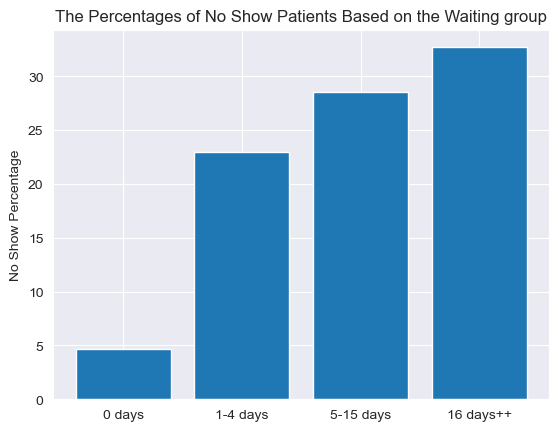

In [39]:
# plot the results as barchart
data = no_show_waiting_group
title = 'The Percentages of No Show Patients Based on the Waiting group'
xpos = [0, 1, 2, 3]
xtranslate = ['0 days', '1-4 days', '5-15 days', '16 days++']
ylabel = 'No Show Percentage'
plot_barchart(data, title, xpos, xtranslate, ylabel)

by returning to our barchart, as long as the waiting period is high, the percentage of missing the appointment increases and vice versa. 

so we can conclude that the waiting period is an important factor to predict the no show of the patient

### Research Question 2: Is the day of the week also an important factor?

In [40]:
no_show_day_of_week = df.groupby('day_of_week').no_show.mean()*100
no_show_day_of_week

day_of_week
0    20.644565
1    20.087370
2    19.686074
3    19.349414
4    21.226142
5    23.076923
Name: no_show, dtype: float64

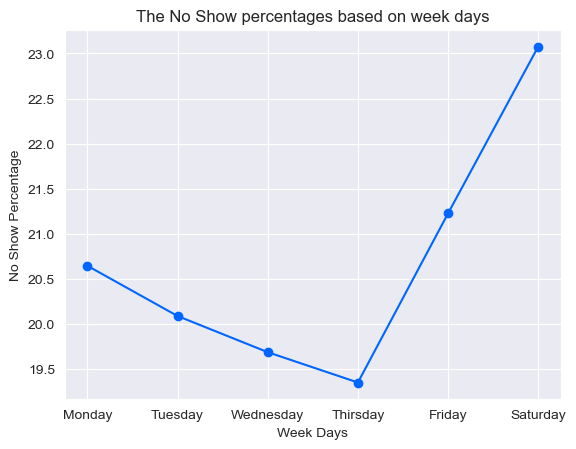

In [41]:
# plot the result
plt.plot(no_show_day_of_week.index, no_show_day_of_week,'o-',color='#0066ff')
plt.xlabel('Week Days')
plt.ylabel('No Show Percentage')
plt.title('The No Show percentages based on week days')
plt.xticks(no_show_day_of_week.index, ['Monday', 'Tuesday', 'Wednesday', 'Thirsday', 'Friday','Saturday'])
plt.show()

by returning to our plot, we note that people missing their appointments mostly at the weekend (Friday and saturday) and also on Monday and Tuesday but the percentage stay lower as at the weekend.

### Research Question 3: Is chronic condition an important factor?

In [42]:
# count the chronic condition
count_chronic_condition = df.hipertension + df.diabetes + df.alcoholism + df.handcap
#insert the result into a new column
df.insert(loc = 10, column = 'count_condition', value = count_chronic_condition)

In [43]:
# count the percentage of no show related to every chronic condition
count_condition = {}
count_condition["hipertension"] = df.query("count_condition <= 1").groupby("hipertension").no_show.mean()[1]*100
count_condition["diabetes"] = df.query("count_condition <= 1").groupby("diabetes").no_show.mean()[1]*100
count_condition["alcoholism"] = df.query("count_condition <= 1").groupby("alcoholism").no_show.mean()[1]*100
count_condition["handcap"] = df.query("count_condition <= 1").groupby("handcap").no_show.mean()[1]*100
count_condition["many_illness"] = df.query("count_condition > 1").no_show.mean()*100
count_condition

{'hipertension': 17.016760594305786,
 'diabetes': 20.3579418344519,
 'alcoholism': 21.644120707596255,
 'handcap': 19.497907949790793,
 'many_illness': 17.69815418023887}

In [44]:
# convert the dictionary to a series
df_count_condition = pd.Series(count_condition)
df_count_condition.sort_values(ascending=False, inplace=True)
df_count_condition

alcoholism      21.644121
diabetes        20.357942
handcap         19.497908
many_illness    17.698154
hipertension    17.016761
dtype: float64

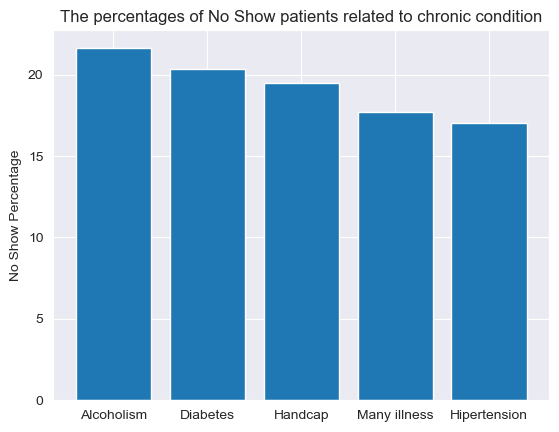

In [45]:
# plot the results
data = df_count_condition
title = 'The percentages of No Show patients related to chronic condition'
xpos = [0, 1, 2, 3, 4]
xtranslate = ['Alcoholism', 'Diabetes', 'Handcap', 'Many illness', "Hipertension"]
ylabel = 'No Show Percentage'
plot_barchart(data, title, xpos, xtranslate, ylabel)

by returning to the chartbar, more than 15% of people living with chronic condition missing there appointments. 

### Research Question 4: Is the age an important factor?

In [46]:
no_show_age = df.groupby("age_group").no_show.mean()*100

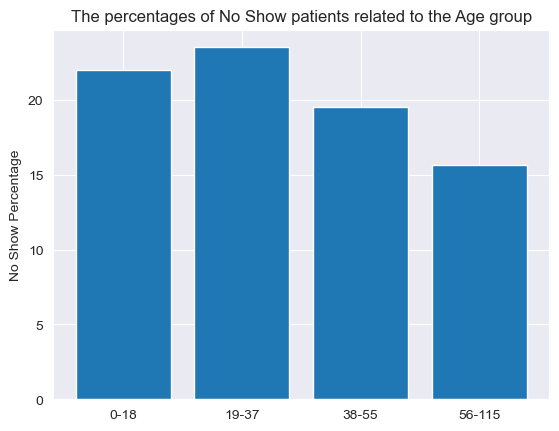

In [47]:
# plot the results 
plt.bar(x = no_show_age.index, height = no_show_age)
plt.title('The percentages of No Show patients related to the Age group')
plt.xticks([0, 1, 2, 3], no_show_age.index)
plt.ylabel('No Show Percentage')
plt.show()

by returning to the chartbar, we can note that the percentages of the Age group are in the same interval like the chronic condition chartbar so it can be conciderate as an important factor to predict if a patient will show up for his scheduled appointment or not.

we can also notice that young people (19-37) are the most missing there scheduled appointments.


### Research Question 5: Is the gender an important factor?

In [48]:
no_show_gender = df.groupby("gender").no_show.mean()*100

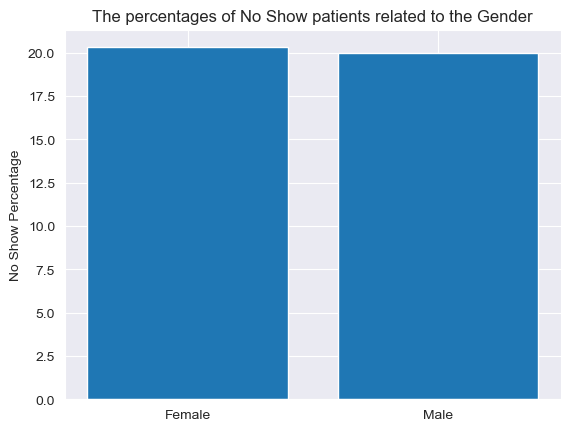

In [49]:
# plot the results 
result= no_show_gender
title = 'The percentages of No Show patients related to the Gender'
xpos = [0, 1]
xtranslate = ['Female', 'Male']
ylabel = 'No Show Percentage'
plot_barchart(result, title, xpos, xtranslate, ylabel)

returning to the chartbar, we note taht the percentage of Male and Female is too close and for this reason we can not considere the Gender as an important factor to predict if a patient will show up for his scheduled appointment or not.

<a id='conclusions'></a>
## Conclusions

> **Question1**: The waiting period is an important factor to predict if a patient will show up for his scheduled appointment or not.<br> the longer the waiting period is, increases the no-show percentage and vice versa.

> **Question2**:  Week days are also an important factor to predict if a patient will show up for his scheduled appointment or not.<br>for example Friday and Saturday recorded the highest percentage of no_show with 23%, on the other side Wednesday and Thirsday recorded the lowest percentage 15%. 

> **Question3**: Chronic condition is an important factor to predict if a patient will show up for his scheduled appointment or not. As an evidence, more than 15% of people living with chronic condition missing there appointments.

> **Question4**: The age is an important factor to predict if a patient will show up for his scheduled appointment or not. <br>
we can notice that young people (19-37) are the most missing there scheduled appointments comparing them with old people (56-115).

> **Question5**: The Gender is not an important factor to predict if a patient will show up for his scheduled appointment or not because the percentage between the two genders is too close.

> **Limitations**: our dataset of 110k rows is limited.as I already mentioned, our dataset was registed on a period of 40 days which is a short period to make a good analysis.we need dataset for long period in order to get more insights from the data   


<p>References</p>
<ul>
    <li>https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html</li>
    <li>https://www.geeksforgeeks.org/bar-plot-in-matplotlib/</li>
    <li>https://numpy.org/doc/stable/user/absolute_beginners.html</li>
    <li>https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html</li>
    <li>https://www.youtube.com/@coreyms</li>
    <li>https://www.w3schools.com/python/pandas/default.asp</li>
    <li>https://stackoverflow.com/questions/20109391/how-to-make-good-reproducible-pandas-examples </li>
    <li>https://www.youtube.com/watch?v=GPVsHOlRBBI</li>
<ul>    